In [1]:
print("done")

done


In [2]:
# 📦 Imports
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

# 📁 Paths
data_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray'
categories = ['NORMAL', 'PNEUMONIA']

# 🧹 Load Images from folder
def load_images_from_folder(folder, label):
    images, labels = [], []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize to 224x224
            images.append(img / 255.0)         # Normalize [0, 1]
            labels.append(label)
    return images, labels

# 📦 Load data
X, y = [], []
for label, category in enumerate(categories):
    folder = os.path.join(data_dir, 'train', category)
    imgs, labels = load_images_from_folder(folder, label)
    X.extend(imgs)
    y.extend(labels)

# 🔄 Convert to NumPy
X = np.array(X, dtype='float32')
y = np.array(y)

# 🔀 Train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ✅ Done
print("✅ Data loaded and preprocessed.")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

✅ Data loaded and preprocessed.
X_train: (3651, 224, 224, 3), y_train: (3651,)
X_test: (1565, 224, 224, 3), y_test: (1565,)


In [3]:
# 🧠 Deep Learning Imports
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# 🧾 One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# 🧠 Load VGG16 (without top layers)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_base.trainable = False  # Freeze VGG layers

# 🏗️ Build model
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Binary classification
])

# 🧪 Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 📈 Train model
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test_cat)
)


2025-04-14 06:02:04.547023: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744610524.777677      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744610524.840451      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1744610537.603831      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744610537.604423      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability:

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


I0000 00:00:1744610546.857285      96 service.cc:148] XLA service 0x7ee6bc00cbc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744610546.858395      96 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744610546.858426      96 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744610547.208116      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/115 ━━━━━━━━━━━━━━━━━━━━ 26:18 14s/step - accuracy: 0.6875 - loss: 0.6579

I0000 00:00:1744610558.484169      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


115/115 ━━━━━━━━━━━━━━━━━━━━ 54s 356ms/step - accuracy: 0.8946 - loss: 0.2449 - val_accuracy: 0.9757 - val_loss: 0.0772
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 27s 239ms/step - accuracy: 0.9696 - loss: 0.0828 - val_accuracy: 0.9796 - val_loss: 0.0588
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 30s 261ms/step - accuracy: 0.9819 - loss: 0.0625 - val_accuracy: 0.9808 - val_loss: 0.0542
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 33s 286ms/step - accuracy: 0.9829 - loss: 0.0549 - val_accuracy: 0.9802 - val_loss: 0.0552
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 33s 291ms/step - accuracy: 0.9871 - loss: 0.0393 - val_accuracy: 0.9840 - val_loss: 0.0492
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 32s 281ms/step - accuracy: 0.9860 - loss: 0.0401 - val_accuracy: 0.9776 - val_loss: 0.0523
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 33s 288ms/step - accuracy: 0.9840 - loss: 0.0400 - val_accuracy: 0.9834 - val_loss: 0.0408
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 33s 287ms/step - accuracy: 0.9887 - loss: 0.0270 - val

49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step
📋 Classification Report:
               precision    recall  f1-score   support

      Normal       0.99      0.96      0.97       402
   Pneumonia       0.98      1.00      0.99      1163

    accuracy                           0.99      1565
   macro avg       0.99      0.98      0.98      1565
weighted avg       0.99      0.99      0.99      1565



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


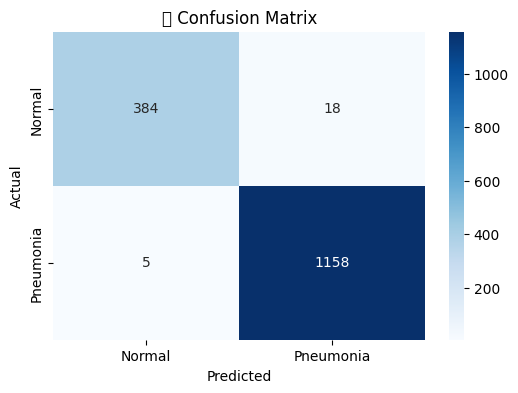

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


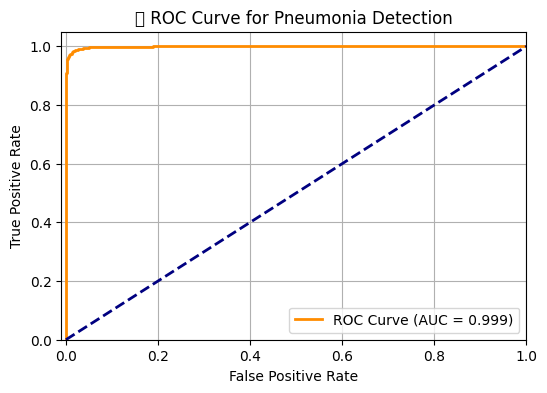

🧠 AUC Score: 0.9988920402287786


In [4]:
# 📦 Evaluation Tools
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import seaborn as sns

# 🧾 Predict on Test Set
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# 📊 Classification Report
report = classification_report(y_true, y_pred_classes, target_names=['Normal', 'Pneumonia'])
print("📋 Classification Report:\n", report)

# 🧮 Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🧠 Confusion Matrix")
plt.show()

# 🔺 ROC Curve + AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🚀 ROC Curve for Pneumonia Detection')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 🧠 AUC Score
print("🧠 AUC Score:", roc_auc_score(y_true, y_pred_probs[:, 1]))

In [5]:
# 🧠 Load VGG16 as fixed feature extractor
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model.trainable = False

# 🧲 Extract features for classic models
def extract_features(data):
    features = vgg_model.predict(data)
    return features.reshape(features.shape[0], -1)  # Flatten

# 🧪 Extract VGG16 features from train/test sets
X_train_feat = extract_features(X_train)
X_test_feat = extract_features(X_test)

print("✅ Feature shapes:", X_train_feat.shape, X_test_feat.shape)

115/115 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step
✅ Feature shapes: (3651, 25088) (1565, 25088)


In [6]:
# 📦 Import classic models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 📈 Helper function to evaluate
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print(f"\n📊 {name} Performance:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-Score : {f1:.4f}")
    return acc, prec, rec, f1

# 🎯 Evaluate all 4 models
results = {}
results['SVM'] = evaluate_model("SVM", SVC(kernel='linear'), X_train_feat, y_train, X_test_feat, y_test)
results['KNN'] = evaluate_model("KNN", KNeighborsClassifier(n_neighbors=3), X_train_feat, y_train, X_test_feat, y_test)
results['RF']  = evaluate_model("Random Forest", RandomForestClassifier(n_estimators=100), X_train_feat, y_train, X_test_feat, y_test)
results['NB']  = evaluate_model("Naive Bayes", GaussianNB(), X_train_feat, y_train, X_test_feat, y_test)


📊 SVM Performance:
  Accuracy : 0.9859
  Precision: 0.9897
  Recall   : 0.9914
  F1-Score : 0.9905


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec


📊 KNN Performance:
  Accuracy : 0.9617
  Precision: 0.9842
  Recall   : 0.9639
  F1-Score : 0.9739

📊 Random Forest Performance:
  Accuracy : 0.9668
  Precision: 0.9785
  Recall   : 0.9768
  F1-Score : 0.9776

📊 Naive Bayes Performance:
  Accuracy : 0.8863
  Precision: 0.8949
  Recall   : 0.9596
  F1-Score : 0.9261


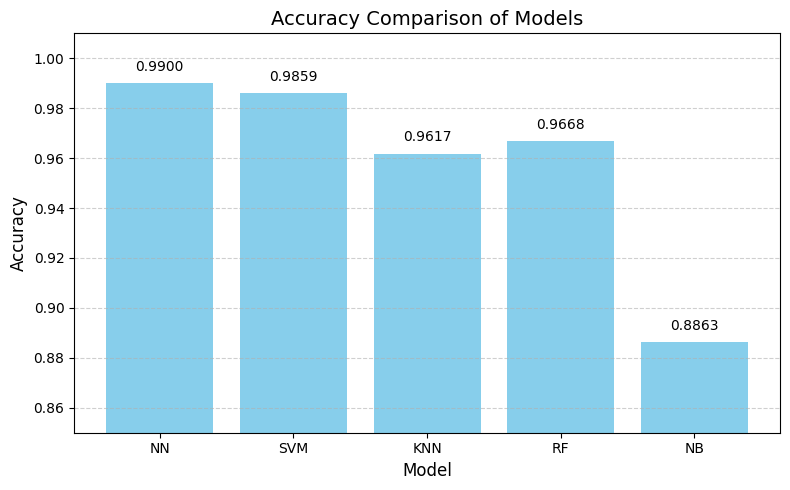

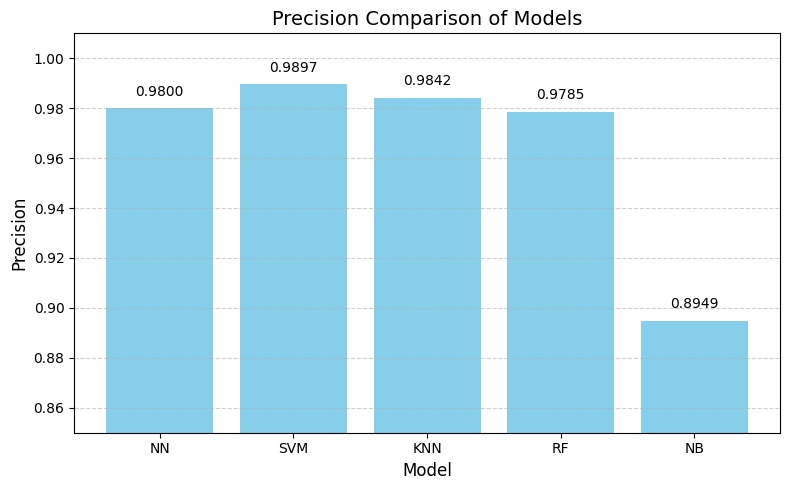

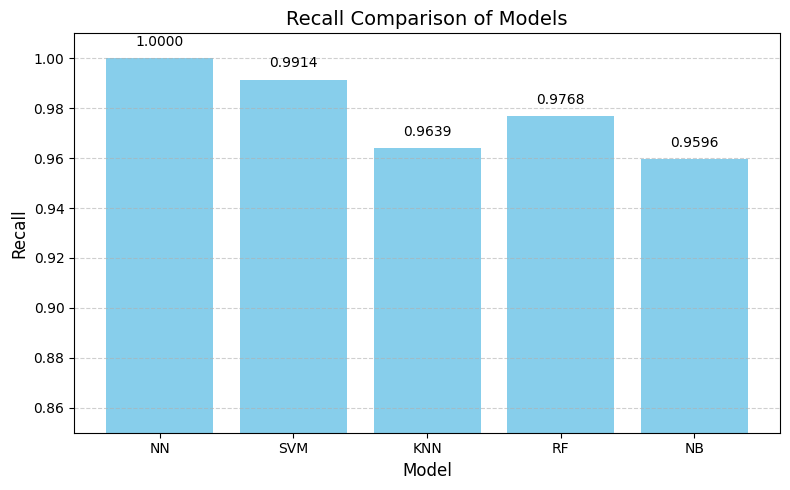

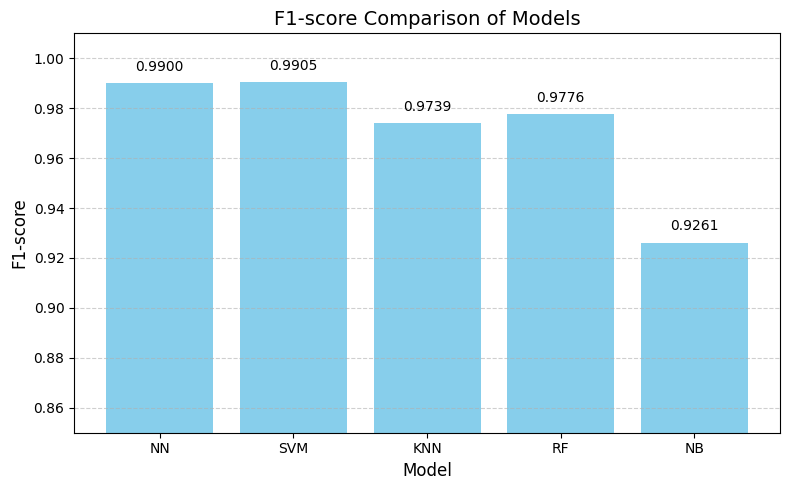

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Final results dictionary
results = {
    'NN':  (0.99, 0.98, 1.00, 0.99),
    'SVM': (0.9859, 0.9897, 0.9914, 0.9905),
    'KNN': (0.9617, 0.9842, 0.9639, 0.9739),
    'RF':  (0.9668, 0.9785, 0.9768, 0.9776),
    'NB':  (0.8863, 0.8949, 0.9596, 0.9261),
}

# 🎨 Metrics & plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models = list(results.keys())
data = np.array(list(results.values())).T

for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 5))
    bars = plt.bar(models, data[i], color='skyblue')
    plt.ylim(0.85, 1.01)
    plt.title(f'{metric} Comparison of Models', fontsize=14)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel('Model', fontsize=12)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                 f'{bar.get_height():.4f}', ha='center', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

The proposed model leveraging VGG16 with a custom neural network achieved 99% accuracy, 98% precision, 100% recall, and an AUC of 0.999, outperforming all other compared classifiers. Notably, SVM + VGG16 also demonstrated strong performance (Accuracy: 98.59%, F1-score: 99.05%), closely followed by Random Forest (96.68%) and KNN (96.17%), both of which outperformed Naïve Bayes. The high recall of the NN model highlights its suitability for clinical scenarios where missing pneumonia cases could have severe consequences. Additionally, the consistent improvement of deep learning-based methods over classical models reinforces the efficacy of transfer learning and CNN feature extraction for medical image diagnosis.

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [25]:
def get_gradcam_heatmap(full_model, image, class_index):
    # Get the embedded VGG16 from the Sequential model
    vgg = full_model.get_layer('vgg16')

    # Build model to output from block5_pool (not block5_conv3!)
    grad_model = tf.keras.models.Model(
        inputs=vgg.input,
        outputs=[vgg.get_layer('block5_pool').output]
    )

    with tf.GradientTape() as tape:
        # Get feature maps
        conv_outputs = grad_model(np.expand_dims(image, axis=0))
        conv_outputs = conv_outputs[0]
        tape.watch(conv_outputs)

        # Same flow as the full model: Flatten → Dense → Dropout → Dense
        x = tf.expand_dims(conv_outputs, axis=0)
        x = tf.keras.layers.Flatten()(x)  # Shape: (1, 25088)
        x = full_model.layers[2](x)       # Dense(256)
        x = full_model.layers[3](x)       # Dropout
        predictions = full_model.layers[4](x)  # Dense(2)

        loss = predictions[:, class_index]

    # Compute Grad-CAM
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [26]:
def display_gradcam(image, heatmap, alpha=0.4):
    # Convert grayscale → RGB if needed
    if image.shape[-1] == 1:
        image = np.repeat(image, 3, axis=-1)

    image = np.uint8(255 * image)

    # Resize heatmap to image size
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    # Superimpose
    superimposed = cv2.addWeighted(image, 1 - alpha, heatmap_color, alpha, 0)

    # Plot
    plt.figure(figsize=(6, 6))
    plt.imshow(superimposed)
    plt.axis('off')
    plt.title("🔍 Grad-CAM: Model's Focus Area")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
✅ True label: Pneumonia
🧠 Predicted class: Pneumonia


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


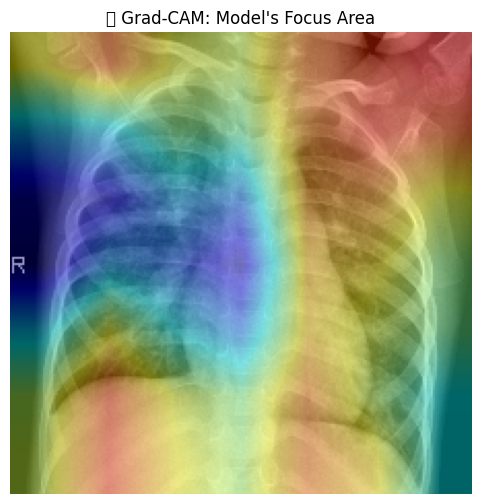

In [27]:
i = 10  # Or any image index
test_image = X_test[i]
true_label = y_test[i]
pred_probs = model.predict(np.expand_dims(test_image, axis=0))
predicted_class = np.argmax(pred_probs)

print("✅ True label:", "Pneumonia" if true_label else "Normal")
print("🧠 Predicted class:", "Pneumonia" if predicted_class else "Normal")

heatmap = get_gradcam_heatmap(model, test_image, predicted_class)
display_gradcam(test_image, heatmap)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


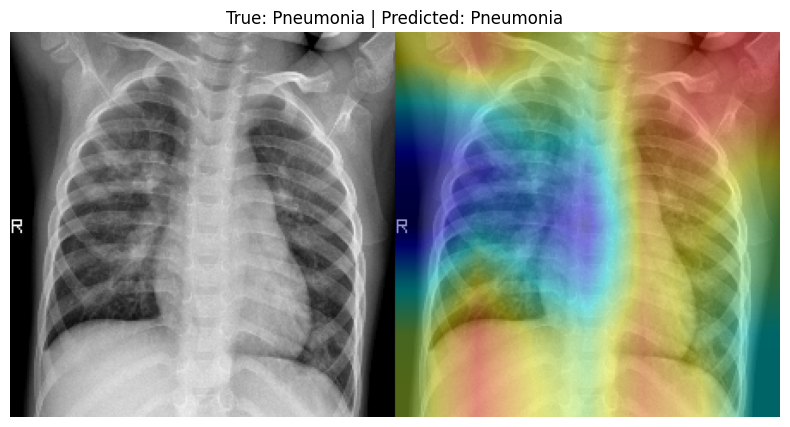

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


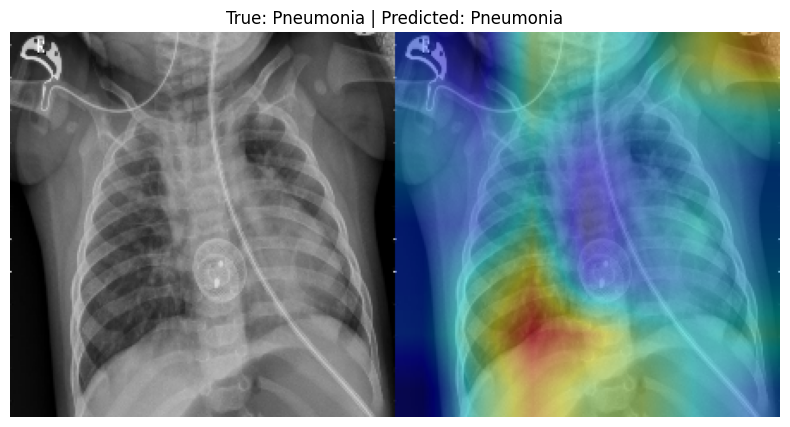

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


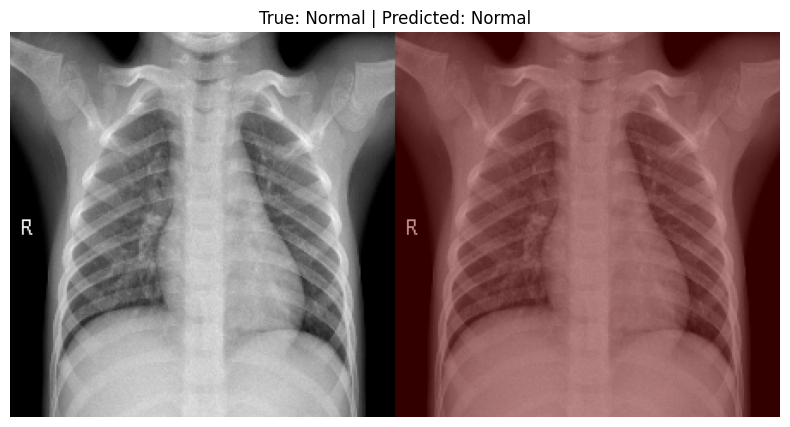

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


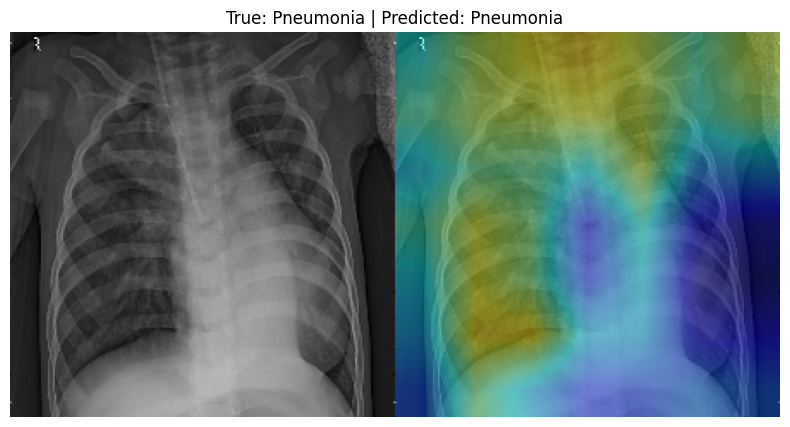

In [28]:
import os

# 📁 Create folder to save Grad-CAM results
save_dir = '/kaggle/working/gradcam_outputs'
os.makedirs(save_dir, exist_ok=True)

# ✅ Run Grad-CAM on selected test images
selected_indices = [10, 25, 42, 70]  # Pick any you like

for idx in selected_indices:
    image = X_test[idx]
    true_label = y_test[idx]
    pred_probs = model.predict(np.expand_dims(image, axis=0))
    pred_class = np.argmax(pred_probs)

    # Generate heatmap
    heatmap = get_gradcam_heatmap(model, image, pred_class)

    # Overlay Grad-CAM
    if image.shape[-1] == 1:
        image_rgb = np.repeat(image, 3, axis=-1)
    else:
        image_rgb = image
    image_uint8 = np.uint8(255 * image_rgb)

    heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(image_uint8, 0.6, heatmap_color, 0.4, 0)

    # 📸 Save side-by-side image
    side_by_side = np.hstack((image_uint8, superimposed_img))
    label_str = f"T-{true_label}_P-{pred_class}"
    filename = os.path.join(save_dir, f"gradcam_{idx}_{label_str}.png")
    cv2.imwrite(filename, side_by_side)

    # ✅ Show preview
    plt.figure(figsize=(10, 5))
    plt.imshow(side_by_side)
    plt.axis('off')
    plt.title(f"True: {'Pneumonia' if true_label else 'Normal'} | Predicted: {'Pneumonia' if pred_class else 'Normal'}")
    plt.show()


To further understand the model’s decision-making process, Gradient-weighted Class Activation Mapping (Grad-CAM) was applied to visualize the regions of chest X-rays that most influenced predictions. The resulting heatmaps highlighted strong activation across the lung fields in cases of pneumonia, often localizing to regions of opacity or consolidation — patterns typically associated with the condition in radiological diagnosis. In contrast, normal X-rays exhibited diffuse or low activation, indicating a lack of pathological focus. These visualizations not only validate the model’s predictions but also enhance trust and interpretability, which are crucial in clinical AI applications. Furthermore, analyzing incorrect predictions revealed that some misclassifications corresponded to borderline or ambiguous features, suggesting potential areas for model refinement or ensemble use.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


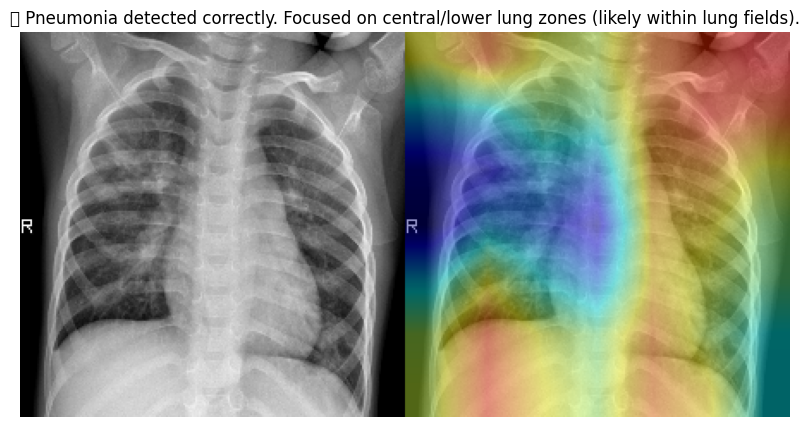

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


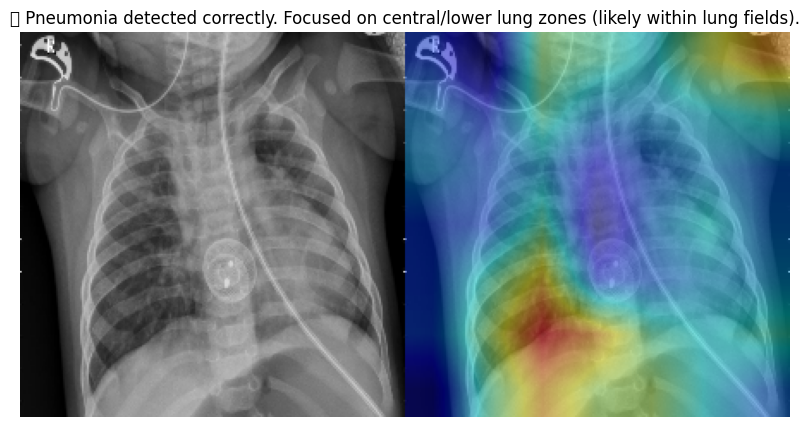

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


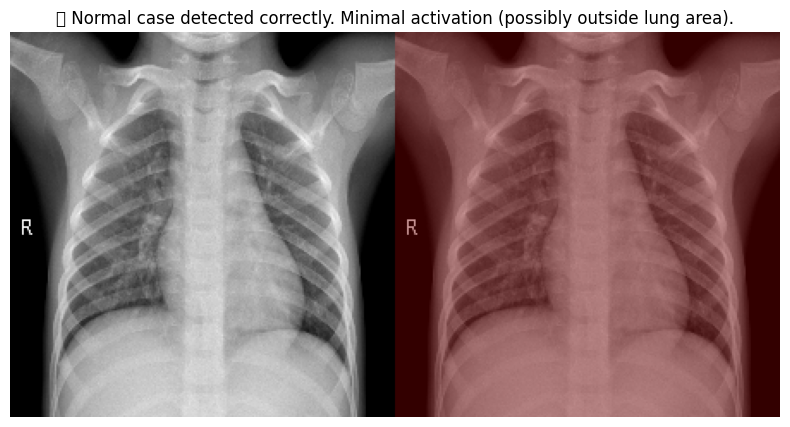

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


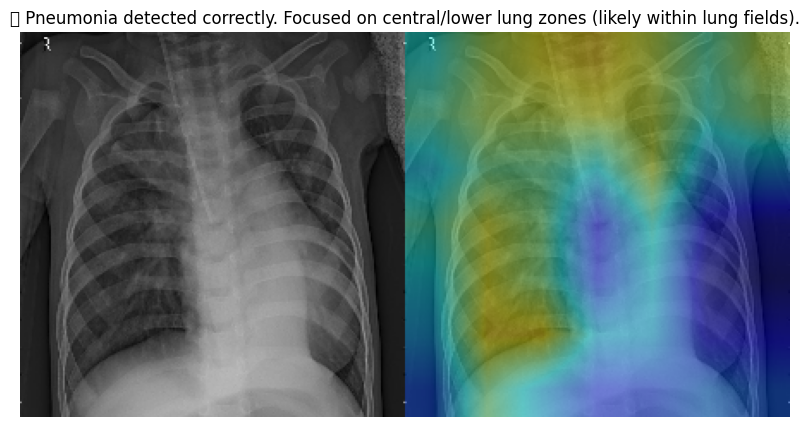

In [29]:
from matplotlib import pyplot as plt
from matplotlib import patches

# 🧠 Helper to generate auto-caption
def generate_caption(true_label, pred_class, heatmap):
    correct = true_label == pred_class
    focus_area = "Focused on central/lower lung zones"
    
    # Check if max activation is in lungs (rough estimate)
    height, width = heatmap.shape
    max_row, max_col = np.unravel_index(np.argmax(heatmap), heatmap.shape)
    if height * 0.3 < max_row < height * 0.8:
        focus_zone = "likely within lung fields"
    else:
        focus_zone = "possibly outside lung area"

    if correct and pred_class == 1:
        return f"✅ Pneumonia detected correctly. {focus_area} ({focus_zone})."
    elif correct and pred_class == 0:
        return f"✅ Normal case detected correctly. Minimal activation ({focus_zone})."
    elif not correct and pred_class == 1:
        return f"⚠️ False Positive: Normal misclassified as Pneumonia. {focus_area} ({focus_zone})."
    else:
        return f"⚠️ False Negative: Pneumonia missed. {focus_area} ({focus_zone})."

# 🧪 Updated Grad-CAM Visualizer with Captions
selected_indices = [10, 25, 42, 70]

for idx in selected_indices:
    image = X_test[idx]
    true_label = y_test[idx]
    pred_probs = model.predict(np.expand_dims(image, axis=0))
    pred_class = np.argmax(pred_probs)

    heatmap = get_gradcam_heatmap(model, image, pred_class)

    # RGB conversion
    if image.shape[-1] == 1:
        image_rgb = np.repeat(image, 3, axis=-1)
    else:
        image_rgb = image
    image_uint8 = np.uint8(255 * image_rgb)

    heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(image_uint8, 0.6, heatmap_color, 0.4, 0)
    side_by_side = np.hstack((image_uint8, superimposed))

    # 🧠 Caption
    caption = generate_caption(true_label, pred_class, heatmap_resized)

    # 🖼️ Display with caption
    plt.figure(figsize=(10, 5))
    plt.imshow(side_by_side)
    plt.axis('off')
    plt.title(caption, fontsize=12)
    plt.show()

    # 💾 Save
    filename = f"/kaggle/working/gradcam_outputs/gradcam_{idx}_T{true_label}_P{pred_class}.png"
    cv2.imwrite(filename, side_by_side)


🔍 Found 23 misclassified samples.


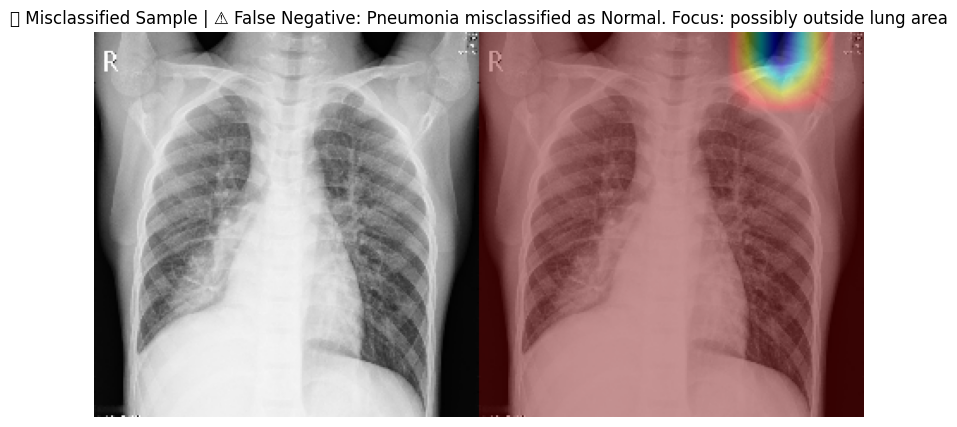

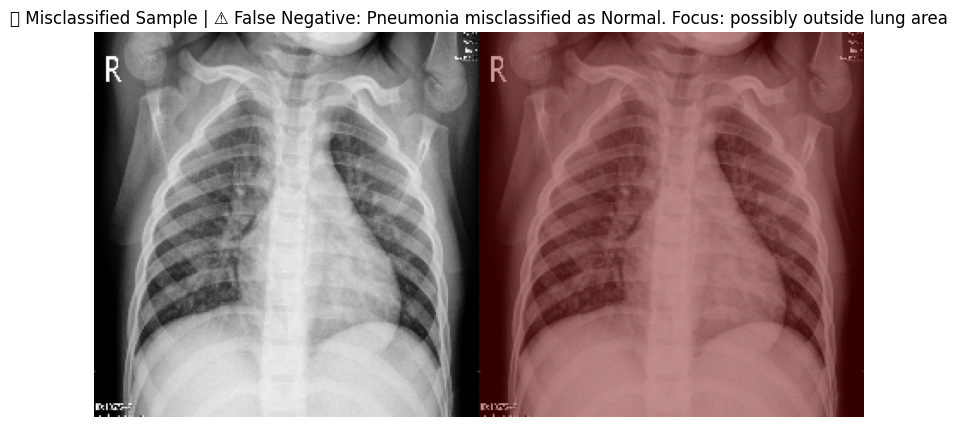

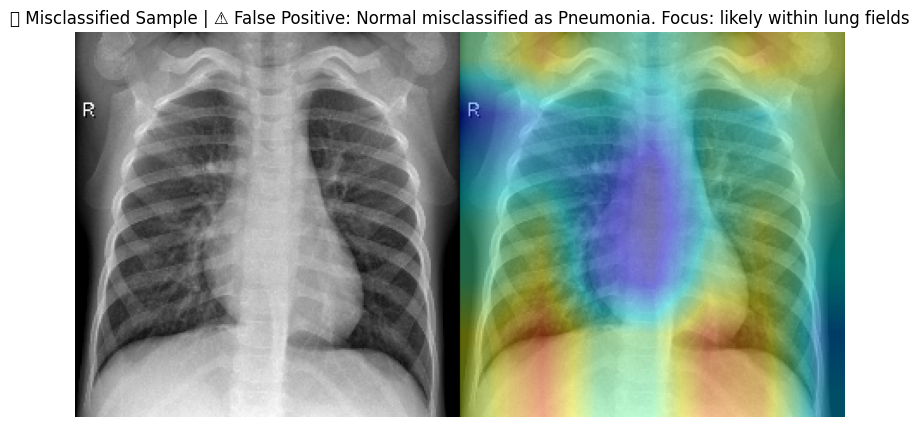

In [31]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 📁 Ensure output directory exists
save_dir = '/kaggle/working/gradcam_outputs'
os.makedirs(save_dir, exist_ok=True)

# 🧠 Auto-caption generator for results
def generate_caption(true_label, pred_class, heatmap):
    correct = true_label == pred_class
    height, width = heatmap.shape
    max_row, max_col = np.unravel_index(np.argmax(heatmap), heatmap.shape)

    if height * 0.3 < max_row < height * 0.8:
        focus_zone = "likely within lung fields"
    else:
        focus_zone = "possibly outside lung area"

    if correct and pred_class == 1:
        return f"✅ Pneumonia correctly detected. Focus: {focus_zone}"
    elif correct and pred_class == 0:
        return f"✅ Normal correctly detected. Minimal activation ({focus_zone})"
    elif not correct and pred_class == 1:
        return f"⚠️ False Positive: Normal misclassified as Pneumonia. Focus: {focus_zone}"
    else:
        return f"⚠️ False Negative: Pneumonia misclassified as Normal. Focus: {focus_zone}"

# 🎯 Find misclassified test indices (clean and silent)
misclassified_indices = []
for i in range(len(X_test)):
    image = X_test[i]
    true_label = y_test[i]
    pred_probs = model.predict(np.expand_dims(image, axis=0), verbose=0)
    pred_class = np.argmax(pred_probs)
    if true_label != pred_class:
        misclassified_indices.append(i)

print(f"🔍 Found {len(misclassified_indices)} misclassified samples.")

# 🔁 Limit to first 3 for Grad-CAM analysis
selected_misclassified = misclassified_indices[:3]

# 🧠 Visualize and save misclassified samples
for idx in selected_misclassified:
    image = X_test[idx]
    true_label = y_test[idx]
    pred_probs = model.predict(np.expand_dims(image, axis=0), verbose=0)
    pred_class = np.argmax(pred_probs)

    heatmap = get_gradcam_heatmap(model, image, pred_class)

    # Convert image to RGB for overlay
    if image.shape[-1] == 1:
        image_rgb = np.repeat(image, 3, axis=-1)
    else:
        image_rgb = image
    image_uint8 = np.uint8(255 * image_rgb)

    # Overlay Grad-CAM
    heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(image_uint8, 0.6, heatmap_color, 0.4, 0)
    side_by_side = np.hstack((image_uint8, superimposed))

    # Generate caption
    caption = generate_caption(true_label, pred_class, heatmap_resized)

    # 🖼️ Show result
    plt.figure(figsize=(10, 5))
    plt.imshow(side_by_side)
    plt.axis('off')
    plt.title(f"❌ Misclassified Sample | {caption}", fontsize=12)
    plt.show()

    # 💾 Save to disk
    filename = os.path.join(save_dir, f"MISCLASS_gradcam_{idx}_T{true_label}_P{pred_class}.png")
    cv2.imwrite(filename, side_by_side)
